In [1]:
!pip install transformers

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 16.5MB/s 
     |████████████████████████████████| 890kB 29.9MB/s 
     |████████████████████████████████| 1.1MB 38.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=f7dee999cd23806778ec1693862c8d13d7ae7b820fb43468b2fe3b291c7fe3a0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [22]:
from transformers import *
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import int32
from tensorflow.keras.initializers import glorot_normal
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score

from keras.layers import Dense, Dropout, Input, GlobalMaxPooling1D, Conv1D, concatenate
from keras.models import  Model
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
import string

In [3]:
def metrics(predictions, y_test):
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    print(f'Verdaderos Negativos: {tn}')
    print(f'Falsos Negativos: {fn}')
    print(f'Verdaderos Positivos: {tp}')
    print(f'Falsos Positivos: {fp}')
    print()
    print(f'precision score: {precision_score(y_test, predictions)}')
    print(f'recall score: {recall_score(y_test, predictions)}')
    print(f'f1 score: {f1_score(y_test,  predictions)}')

In [4]:
# Créditos a este notebook https://www.kaggle.com/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}


def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Esta lista de contractions la obtuvimos de un notebook de Kaggle también, el cual pone como fuente al siguiente
# post de stackoverflow http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks",
"didnt" : "did not"
}


def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

def clean_text(text):
    words = text.split(' ')
    words = [convert_abbrev(word) for word in words]
    words = [remove_contractions(word) for word in words]
    text = ' '.join([word for word in words if not word.startswith('@')])
    return text

In [5]:
url_train = 'https://raw.githubusercontent.com/fsicardir/datos-tp2/master/dataset/train.csv?token=AFVAIUW66UE3NA5X2SYXNPC7GHGJY'
url_test = 'https://raw.githubusercontent.com/fsicardir/datos-tp2/master/dataset/test.csv?token=AFVAIUUSBVEOOMDIFV4GU6C7GHGNK'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# Quitamos las urls
df_train['text'] = df_train['text'].str.replace(r'http:\/\/.*', '', regex=True).replace(r'https:\/\/.*', '', regex=True)
df_test['text'] = df_test['text'].str.replace(r'http:\/\/.*', '', regex=True).replace(r'https:\/\/.*', '', regex=True)

df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [6]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


train_text = np.array([tokenizer.encode(text,
                                     add_special_tokens=True, 
                                     max_length=40, truncation=True,
                                     pad_to_max_length=True) for text in df_train["text"]])

test_text = np.array([tokenizer.encode(text, 
                           add_special_tokens=True, 
                           max_length=40, truncation=True, 
                           pad_to_max_length=True) for text in df_test["text"]])

In [7]:
train_text.shape

(7613, 40)

Some weights of the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
tf_roberta_model_4 (TFRobertaMo ((None, 40, 768), (N 124645632   input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 38, 128)      295040      tf_roberta_model_4[0][0]         
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 37, 128)      393344      tf_roberta_model_4[0][0]         
_______________________________________________________________________________________

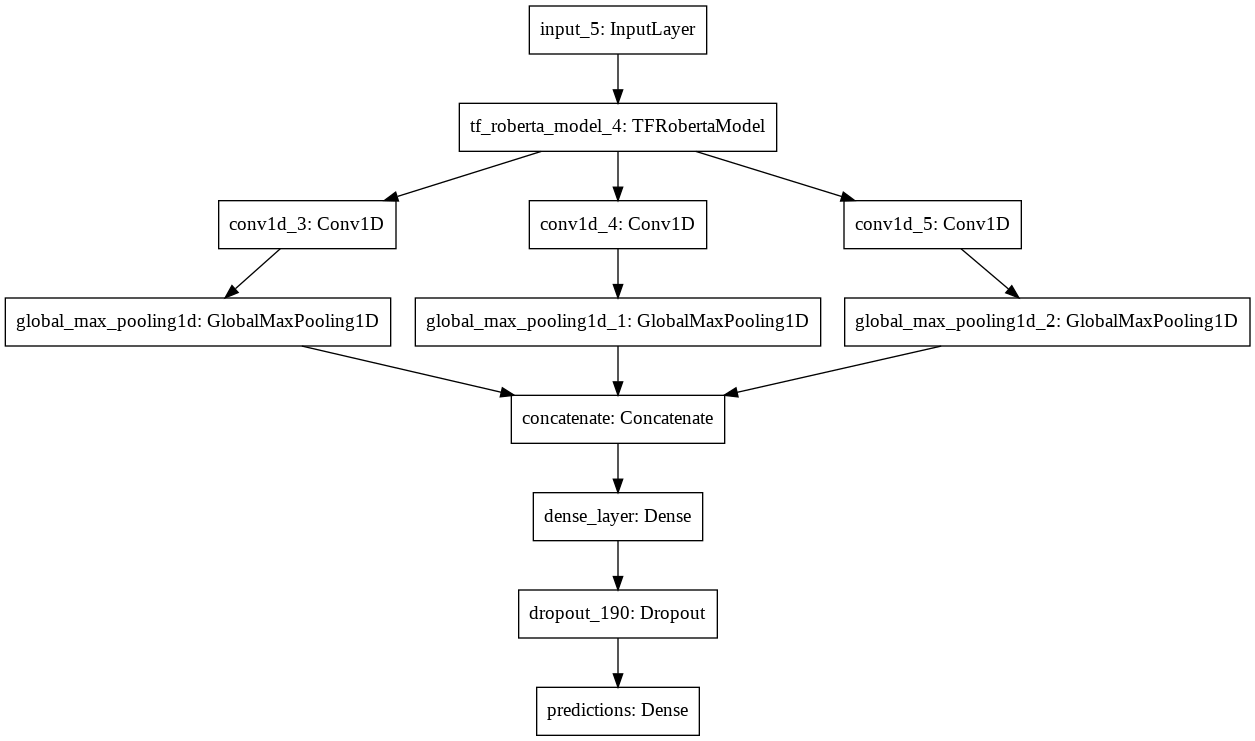

In [23]:
def rate(epoch):
    return 1.5e-5/(epoch + 1)


input_ids = Input((40,), dtype=int32)
roberta_pretrained = TFRobertaModel.from_pretrained('roberta-base')
sequence, cls = roberta_pretrained(input_ids)

conv1 = Conv1D(128, kernel_size=3, activation='relu', name='conv_size_3')(sequence)
conv1 = GlobalMaxPooling1D()(conv1)

conv2 = Conv1D(128, kernel_size=4, activation='relu', name='conv_size_4')(sequence)
conv2 = GlobalMaxPooling1D()(conv2)

conv3 = Conv1D(128, kernel_size=2, activation='relu', name='conv_size_2')(sequence)
conv3 = GlobalMaxPooling1D()(conv3)

pooling = concatenate([conv1, conv2, conv3])

dense = Dense(64, activation='relu', name='dense_layer')(pooling)
dropout = Dropout(0.5)(dense)

predictions = Dense(1, activation="sigmoid", name="predictions")(dropout)
model = Model(input_ids, predictions)

scheduler = LearningRateScheduler(rate)

model.compile(optimizer='adam', loss="binary_crossentropy",  metrics=["accuracy"])
model.summary()
plot_model(model)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_text, df_train.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6090, 40), (1523, 40), (6090,), (1523,))

In [25]:
EPOCHS = 3
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[scheduler], epochs=EPOCHS, verbose=True)

Epoch 1/3
191/191 [==============================] - 121s 632ms/step - loss: 0.5381 - accuracy: 0.7412 - val_loss: 0.4138 - val_accuracy: 0.8464
Epoch 2/3
191/191 [==============================] - 118s 615ms/step - loss: 0.3840 - accuracy: 0.8391 - val_loss: 0.3898 - val_accuracy: 0.8431
Epoch 3/3
191/191 [==============================] - 117s 614ms/step - loss: 0.3483 - accuracy: 0.8575 - val_loss: 0.4033 - val_accuracy: 0.8437


In [26]:
preds = model.predict(X_test)

preds = [1 if x >= 0.5 else 0 for x in preds]
metrics(preds, y_test)

Verdaderos Negativos: 773
Falsos Negativos: 137
Verdaderos Positivos: 512
Falsos Positivos: 101

precision score: 0.835236541598695
recall score: 0.7889060092449923
f1 score: 0.8114104595879557


In [27]:
test_preds = model.predict(test_text)

In [28]:
test_preds = [1 if x >= 0.5 else 0 for x in test_preds]

df_test['target'] = test_preds

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
5,12,NaN,NaN,we are shaking...It's an earthquake,1
6,21,NaN,NaN,they would probably still show more life than ...,0
7,22,NaN,NaN,Hey! How are you?,0
8,27,NaN,NaN,What a nice hat?,0
9,29,NaN,NaN,Fuck off!,0


In [29]:
df_test[['id', 'target']].to_csv('roberta-cnn-multi-filter.csv', index=False)